In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [7]:
rob1 = Image.open(r'D:\Users\Miguel\Documents\TCC_faces\Primera\conti.jpg')
rob2 = Image.open('robert2.jpg')
chris = Image.open('chris.jpg')

(-0.5, 99.5, 99.5, -0.5)

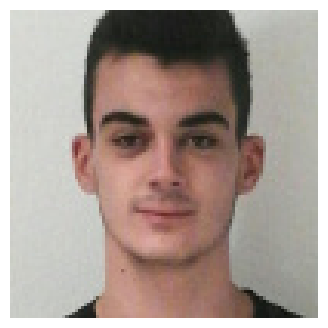

In [8]:
plt.figure(figsize=(5, 4))
plt.imshow(rob1)
plt.axis('off')

In [12]:
import torch
from facenet_pytorch import MTCNN
import numpy as np

# Detectar si se dispone de GPU cuda
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))
mtcnn = MTCNN(
            select_largest = True,
            min_face_size  = 20,
            thresholds     = [0.6, 0.7, 0.7],
            post_process   = False,
            image_size     = 160,
            device         = device
        )

Running on device: cpu


In [13]:
boxes, probs, landmarks = mtcnn.detect(rob1, landmarks=True)
print('Bounding boxes:', boxes)
print('Probability:', probs)
print('landmarks:', landmarks)

Bounding boxes: [[25.902097702026367 16.328022003173828 73.98213958740234
  82.26824951171875]]
Probability: [0.9999560117721558]
landmarks: [[[39.176673889160156 42.989105224609375]
  [62.183414459228516 42.87737274169922]
  [50.519126892089844 54.85158157348633]
  [40.59566879272461 65.61161041259766]
  [60.562652587890625 66.0963134765625]]]


(-0.5, 99.5, 99.5, -0.5)

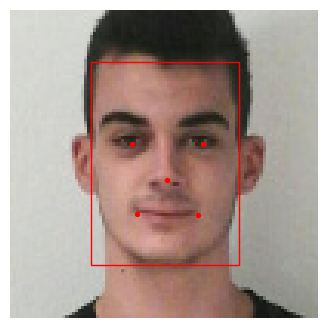

In [14]:
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(5, 4))
ax.imshow(rob1)
ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'red'
       )
ax.add_patch(rect)
ax.axis('off')

In [9]:
imagen_2 =Image.open('malitos.jpg')

(-0.5, 799.5, 549.5, -0.5)

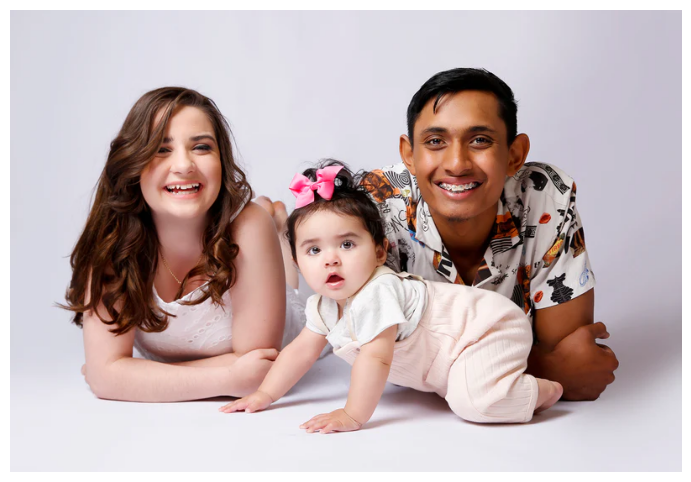

In [10]:
plt.figure(figsize=(10, 6))
plt.imshow(imagen_2)
plt.axis('off')

(-0.5, 799.5, 549.5, -0.5)

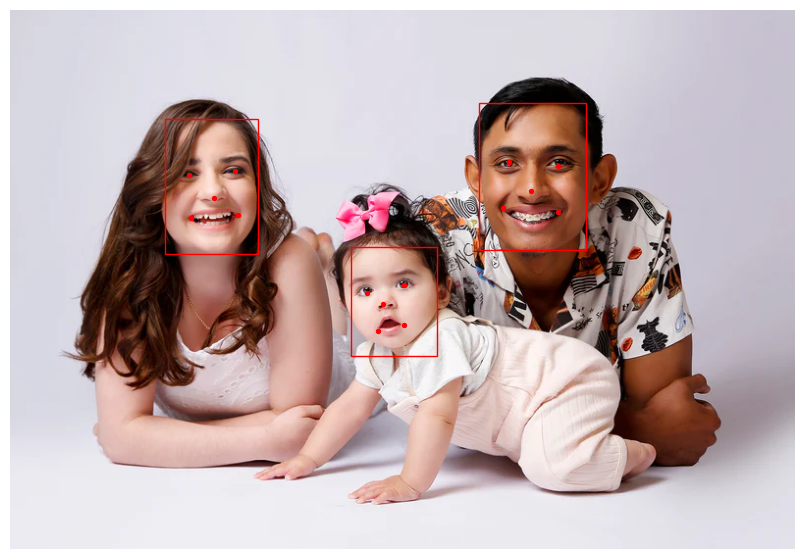

In [11]:
boxes, probs, landmarks = mtcnn.detect(imagen_2, landmarks=True)

# Representación con matplotlib
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(imagen_2)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'red'
           )
    ax.add_patch(rect)
    
ax.axis('off')

(-0.5, 159.5, 159.5, -0.5)

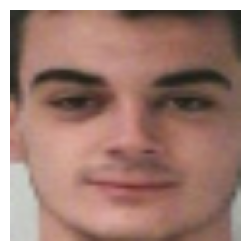

In [15]:
# Detección de cara
# ==============================================================================
face = mtcnn.forward(rob1)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
face = face.permute(1, 2, 0).int().numpy()
ax.imshow(face)
plt.axis('off')

In [17]:
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )
faces = mtcnn.forward(rob1)

In [31]:
round(faces.shape[0] /5)

1

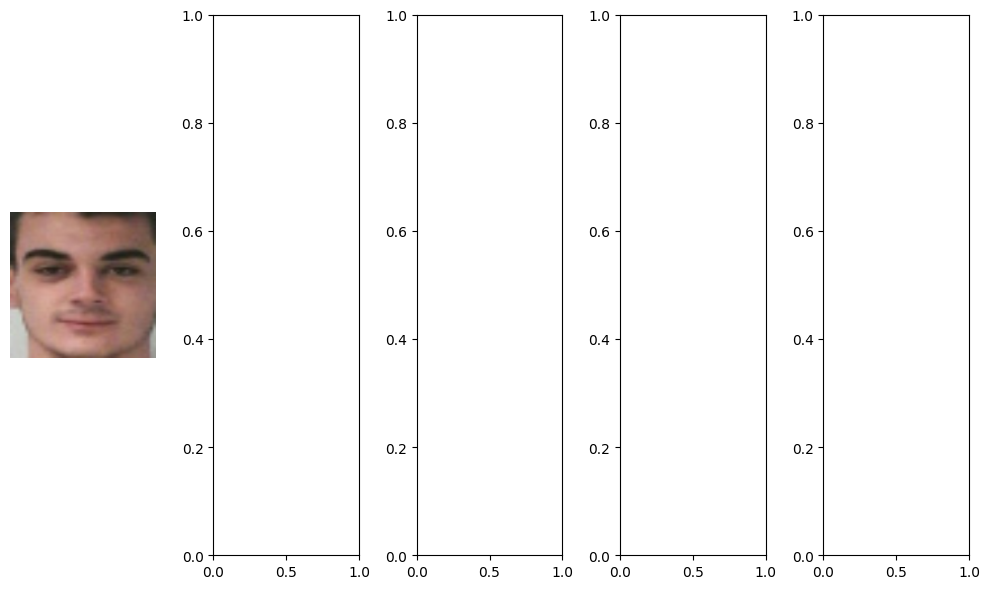

In [18]:
import math
n_caras = faces.shape[0] 

fig, axs = plt.subplots(nrows=math.ceil(n_caras/5), ncols=5, figsize=(10, 6))
axs= axs.flatten()

for i in range(faces.shape[0]):
    face = faces[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout()

In [19]:
from facenet_pytorch import InceptionResnetV1
encoder = InceptionResnetV1(pretrained='vggface2', classify=False, device=device).eval()

In [20]:
cara = mtcnn(rob1)
embedding_cara = encoder.forward(cara.reshape((1,3, 160, 160))).detach().cpu()
embedding_cara

tensor([[ 5.4672e-02, -2.7623e-03,  3.5870e-02,  2.8749e-02,  7.6676e-02,
         -5.3425e-02, -1.2437e-02,  4.3238e-03, -2.2229e-02, -4.0972e-02,
         -9.1857e-02, -2.7034e-02, -9.6207e-02, -4.9206e-03,  6.0180e-02,
         -6.3919e-02, -2.0527e-02, -1.2657e-02,  2.3562e-02,  3.1894e-02,
          9.3420e-03,  4.9273e-02, -4.8741e-02,  5.7395e-04,  9.7496e-03,
          1.2108e-02,  1.2379e-01, -9.6892e-03,  4.4321e-02, -9.4415e-02,
         -5.0637e-03,  3.2079e-02,  3.1422e-02,  9.8416e-03,  7.0894e-02,
          1.0831e-02, -6.8443e-02,  4.5298e-02, -2.1379e-02,  3.2189e-02,
         -1.2938e-02,  2.4704e-02,  1.6001e-02, -1.2515e-01, -2.1131e-02,
         -6.4808e-02,  3.3741e-04, -3.7992e-03, -6.2113e-02,  2.7022e-02,
          8.9074e-02,  6.7286e-02,  6.2164e-02,  5.2262e-02, -2.4873e-02,
         -4.2199e-02,  3.5060e-02,  7.6944e-02,  4.3804e-03,  1.3124e-02,
         -5.2367e-03, -8.7825e-02,  9.4084e-02, -4.4272e-02,  6.2938e-03,
          1.9785e-02,  3.5329e-02,  6.

In [35]:
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )